<a id="section1"></a>
### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [1]:
# importing important libraries
import os

import numpy as np
import pandas as pd
from scipy import optimize

# for plotting purpose
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
## Loading Data ##
data = pd.read_csv(filepath_or_buffer='Data/ex2data1.txt', delimiter=',', header=None)
data = data.to_numpy()
X, y = data[:, :-1], data[:, -1]


In [3]:
## Plotting Data ##
def plotData(X, y):
    fig = pyplot.figure()
    
    pos = (y == 1)
    neg = (y == 0)
    
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

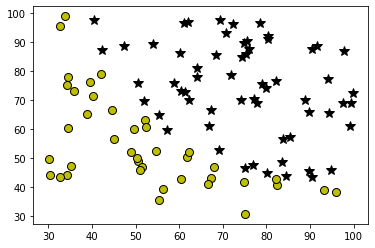

In [4]:
plotData(X, y)

In [5]:
def sigmoid(z):
    z = np.array(z)
    g = 1/(1 + np.exp(-z))
    return g

In [6]:
def costFunction(theta, X, y):
    m = y.size
    
    expected_values = sigmoid(X@theta)
    
    J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)))/m
    grad = ((expected_values - y)@X)/m
    
    return J, grad

In [7]:
#### METHOD 1: USING OPTIMIZE FUNCTION ###

X = data[:, :-1]
# Adding 1s column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

initial_theta = np.zeros(X.shape[1])
options = {'maxiter': 400}

res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True, options=options)
theta = res.x

<ipython-input-6-641a636262f3>:6: RuntimeWarning: divide by zero encountered in log
  J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)))/m
<ipython-input-6-641a636262f3>:6: RuntimeWarning: invalid value encountered in matmul
  J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)))/m


In [8]:
def predict(theta, X):
    p = sigmoid(X@theta)
    p = (p >= 0.5)
    return p

In [9]:
# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Train Accuracy: 89.00 %


<a id="section5"></a>
### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [10]:
def costFunctionReg(theta, X, y, lambda_):
    
    if y.dtype == bool:
        y = y.astype(int)
    
    m = X.shape[0]
    
    expected_values = sigmoid(X@theta)
    
    theta_1 = theta.copy()
    theta_1[0] = 0
    
    J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)) + lambda_*np.sum(np.square(theta_1))/2)/m
    
    grad = ((expected_values - y)@X + lambda_*theta_1)/m
    
    return J, grad

In [11]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
options = {'maxiter': 400}

res = optimize.minimize(costFunctionReg, initial_theta, (X, y, lambda_), jac=True, options=options)
print(res.x)

[-25.05214746   0.20535445   0.20058356]


<ipython-input-10-ad9c36a1210b>:13: RuntimeWarning: divide by zero encountered in log
  J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)) + lambda_*np.sum(np.square(theta_1))/2)/m
<ipython-input-10-ad9c36a1210b>:13: RuntimeWarning: invalid value encountered in matmul
  J = (np.sum(-y@np.log(expected_values) - (1-y)@np.log(1-expected_values)) + lambda_*np.sum(np.square(theta_1))/2)/m


## 1 Multi-class Classification

For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you have learned can be used for this classification task.

In the first part of the exercise, you will extend your previous implementation of logistic regression and apply it to one-vs-all classification.

In [12]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat('Data/ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0
m = y.size

In [13]:
def oneVsAll(X, y, num_labels, lambda_):
    
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    initial_theta = np.zeros((n + 1))
    options = {'maxiter': 400}
    for i in range(num_labels):
        y_ = (y == i)
        res = optimize.minimize(costFunctionReg, initial_theta, (X, y_, lambda_), jac=True, options=options)
        all_theta[i, :] = res.x
    
    return all_theta

In [14]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    
    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    expected_values = sigmoid(X@all_theta.T)
    p = np.argmax(expected_values, axis=1)
    
    return p

In [15]:
lambda_ = 1
theta = oneVsAll(X, y, num_labels, lambda_)

In [16]:
p = predictOneVsAll(theta, X)
print(np.mean(p == y)*100)

94.46
